<a href="https://colab.research.google.com/github/Dohwan93/Image_Processing_Algorithms/blob/main/yolo11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 20.5 MB/s eta 0:00:00


In [5]:
# Predict using a pretrained YOLO model (e.g., YOLO11n) on an image
!yolo predict model=yolo11x.pt source='/content/drive/MyDrive/Test.jpg'

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Ultralytics 8.3.235 🚀 Python-3.12.12 torch-2.9.0+cu126 CPU (Intel Xeon CPU @ 2.20GHz)
YOLO11x summary (fused): 190 layers, 56,919,424 parameters, 0 gradients, 194.9 GFLOPs

image 1/1 /content/drive/MyDrive/Test.jpg: 640x640 8 persons, 2 chairs, 5234.5ms
Speed: 18.0ms preprocess, 5234.5ms inference, 40.9ms postprocess per image at shape (1, 3, 640, 640)
Results saved to /content/runs/detect/predict
💡 Learn more at https://docs.ultralytics.com/modes/predict


Ultralytics 8.3.235 🚀 Python-3.12.12 torch-2.9.0+cu126 CPU (Intel Xeon CPU @ 2.20GHz)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=coco8.yaml, degrees=0.0, deterministic=True, device=cpu, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=1, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11x.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pretrained=T

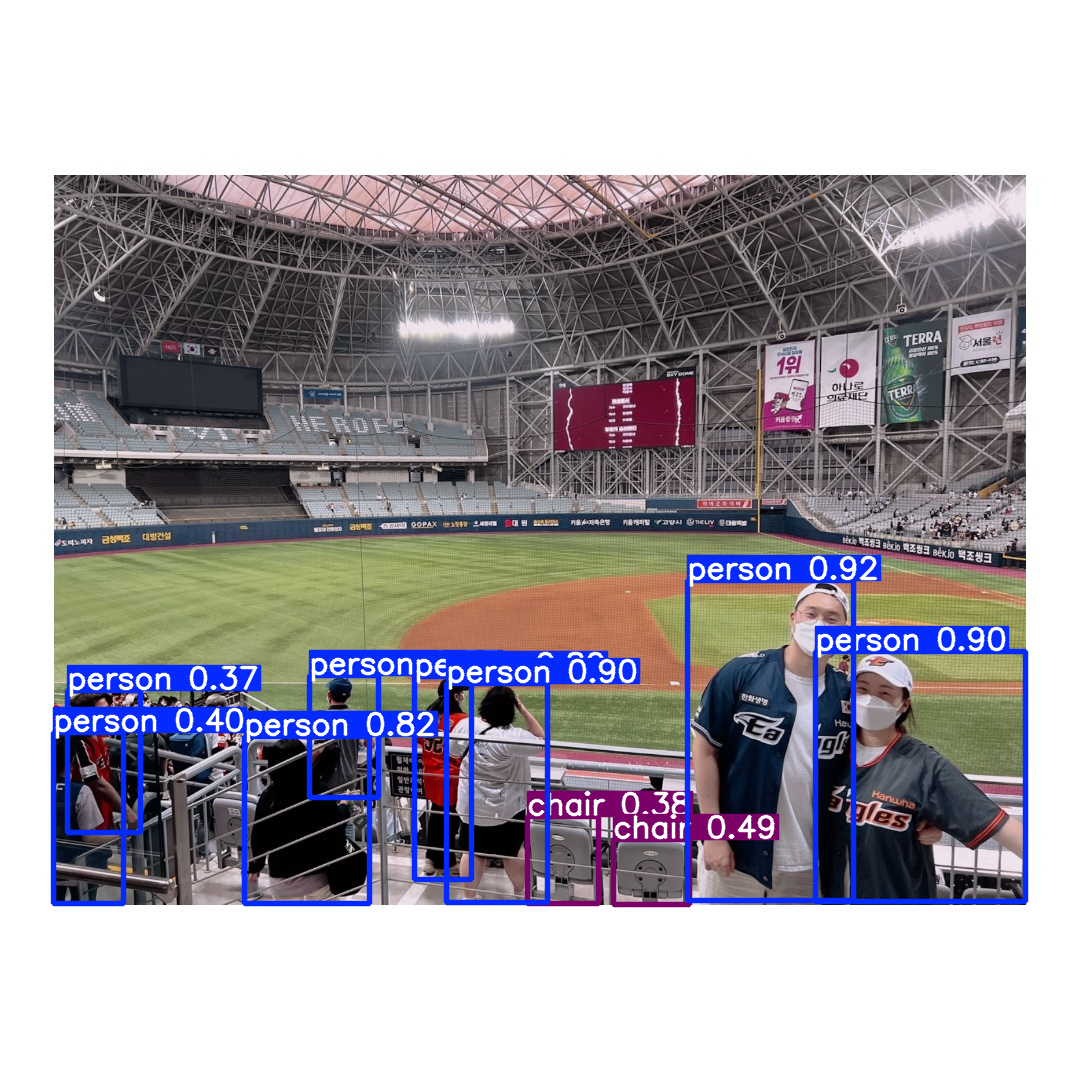

Ultralytics 8.3.235 🚀 Python-3.12.12 torch-2.9.0+cu126 CPU (Intel Xeon CPU @ 2.20GHz)
💡 ProTip: Export to OpenVINO format for best performance on Intel hardware. Learn more at https://docs.ultralytics.com/integrations/openvino/

PyTorch: starting from '/content/runs/detect/train/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 84, 8400) (109.3 MB)
requirements: Ultralytics requirements ['onnx>=1.12.0,<=1.19.1', 'onnxslim>=0.1.71', 'onnxruntime'] not found, attempting AutoUpdate...
Using Python 3.12.12 environment at: /usr
Resolved 14 packages in 288ms
Prepared 6 packages in 1.97s
Installed 6 packages in 317ms
 + colorama==0.4.6
 + coloredlogs==15.0.1
 + humanfriendly==10.0
 + onnx==1.19.1
 + onnxruntime==1.23.2
 + onnxslim==0.1.78

requirements: AutoUpdate success ✅ 3.3s
WARNING ⚠️ requirements: Restart runtime or rerun command for updates to take effect


ONNX: starting export with onnx 1.19.1 opset 22...
ONNX: slimming with onnxslim 0.1.78...
ONNX: expo

In [6]:
from ultralytics import YOLO

# Load a pretrained YOLO11n model
model = YOLO("yolo11x.pt")

# Train the model on the COCO8 dataset for 100 epochs
train_results = model.train(
    data="coco8.yaml",  # Path to dataset configuration file
    epochs=1,  # Number of training epochs
    imgsz=640,  # Image size for traininga,3])
)

# Evaluate the model's performance on the validation set
metrics = model.val()

# Perform object detection on an image
results = model("/content/drive/MyDrive/Test.jpg")  # Predict on an image
results[0].show()  # Display results

# Export the model to ONNX format for deployment
path = model.export(format="onnx")  # Returns the path to the exported model